# Smooth fit to log-odds ratios
**objective** : The objective of this study is to observe the influence/association between death from maternal exposure to X-rays and childhood cancer for subjects partitioned into 120 age and birth-year strata.



## 1. Data

Description : 
- $r^0_i$ : is the number of deaths among unexposed subjects in stratum $i$, 
- $n^0_i$ : is the total number of unexposed subjects in stratum $i$, 
- $r^1_i$ : is the number among exposed subjects in stratum $i$, 
- $n^1_i$ : is the total number of exposed subjects in stratum $i$
- $\text{year}_i$ : is the stratum-specific birth year (relative to 1954).

In [37]:
import numpy as np
import pandas as pd
from tqdm import trange
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [38]:
r1 = np.asarray([3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6,  
               5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 
               8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 
               4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 
               9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 
               9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 
               7, 5, 7, 6, 3, 7])
n1 = np.asarray([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
r0 = np.asarray([0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 
               4, 1, 4, 5, 2, 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 
               5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 
               8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 
               9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 
               3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1])
n0 = np.asarray([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
year = np.asarray([-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, 
                 -5, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, 
                 -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, 
                 -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 
                 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 
                 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10])

df = pd.DataFrame({'year': year,'n0': n0, 'n1': n1, 'r0': r0, 'r1':r1})
df.reset_index(drop=True, inplace=True)
df

,year,n0,n1,r0,r1
0,-10,28,28,0,3
1,-9,21,21,2,5
2,-9,32,32,2,2
3,-8,35,35,1,7
4,-8,35,35,2,7
...,...,...,...,...,...
115,8,51,51,2,5
116,8,42,42,4,7
117,9,46,46,6,6
118,9,54,54,4,3


# Model 

The proposed model [source](https://pj.freefaculty.org/Ubuntu/15.04/amd64/openbugs/openbugs-3.2.3/doc/Examples/Oxford.html) is as follows. $\forall i \text{ (stratum)} $

-   $r_i^0 \sim \text{Binomial}(n_i^0,p_i^0)$
-   $r_i^1 \sim \text{Binomial}(n_i^1,p_i^1)$.

The parameters $p_i^0$, $p_i^1$ are given by :

-   $p_i^0 = \text{sigmoid}(\mu_i)$
-   $p_i^1 = \text{sigmoid}(\mu_i+log\psi_i)$
    -   $\log\psi_i = \alpha+\beta_1 year_i+\beta_2(year_i^2-22)+b_i $
    -   $p_i^1 = \text{sigmoid}(\mu_i+\alpha+\beta_1 year_i+\beta_2(year_i^2-22)+b_i)$ 
- $ b_i \sim\mathcal N(0,1/\tau)$ ou $b_i \sim\mathcal N(0,\sigma^2)$

Then the non - informative laws are given by :
-  $\tau \sim\mathcal Gamma(10^{-3},10^{-3})$
-  $\sigma^2 \sim\mathcal InvGamma(10^{-3},10^{-3})$

-  $ \mu_i \sim\mathcal N(0,10^{6})$
-  $ \alpha \sim\mathcal N(0,10^{6})$
-  $ \beta_1 \sim\mathcal N(0,10^{6})$
-  $ \beta_2 \sim\mathcal N(0,10^{6})$

In [39]:
import numpy as np
from scipy.special import expit ## Better than manual implementation of sigmoid

def p0_f(mu):
    """
    Computes the probability that an unexposed individual is sick given the stratum-specific intercept mu,
    assuming a logistic regression model with a logit link function.
    
    Parameters:
    mu (float or numpy array): the stratum-specific intercept(s) of the logistic regression model.
    
    Returns:
    float or numpy array: the probability of a sick individual given the intercept mu, computed using the sigmoid function.
    """
    return expit(mu)

def p1_f(mu, alpha, beta1, beta2, b, year):
    """
    Computes the probability that an exposed individual is sick given the stratum-specific intercept mu,
    as well as the exposure-specific intercept alpha and slope parameters beta1 and beta2, the random effect b, 
    and the stratum-specific birth year year. Assumes a logistic regression model with a logit link function.
    
    Parameters:
    mu (float or numpy array): the stratum-specific intercept(s) of the logistic regression model.
    alpha (float): the exposure-specific intercept parameter of the logistic regression model.
    beta1 (float): the slope parameter of the logistic regression model for the birth year.
    beta2 (float): the second-order polynomial parameter of the logistic regression model for the birth year.
    b (float or numpy array): the random effect term(s) with a normal prior distribution.
    year (float or numpy array): the stratum-specific birth year(s) relative to 1954.
    
    Returns:
    float or numpy array: the probability of a sick individual given the logistic regression parameters and the random effect b, 
    computed using the sigmoid function.
    """
    return expit(mu + alpha + beta1*year + beta2*(year**2-22) + b)

def log_likelihood_r1(mu, alpha, beta1, beta2, b, r1, n1, year):
    """
    Computes the log-likelihood of the response variable for the exposed subjects in a stratum, given the stratum-specific intercept mu,
    as well as the exposure-specific intercept alpha and slope parameters beta1 and beta2, the random effect b, 
    the observed number of successes r1, the total number of trials n1, and the stratum-specific birth year year.
    Assumes a logistic regression model with a logit link function.
    
    Parameters:
    mu (float): the stratum-specific intercept of the logistic regression model.
    alpha (float): the exposure-specific intercept parameter of the logistic regression model.
    beta1 (float): the slope parameter of the logistic regression model for the birth year.
    beta2 (float): the second-order polynomial parameter of the logistic regression model for the birth year.
    b (float): the random effect term with a normal prior distribution.
    r1 (int): the number of successes (sick individuals) among the exposed subjects in the stratum.
    n1 (int): the total number of exposed subjects in the stratum.
    year (float): the stratum-specific birth year relative to 1954.
    
    Returns:
    float: the log-likelihood of the response variable for the exposed subjects in the stratum, given the logistic regression parameters 
    and the random effect b, computed using the sigmoid function.
    """
    p1 = p1_f(mu, alpha, beta1, beta2, b, year)
    r1 = np.sum(r1 * np.log(p1)) + sum((n1-r1) * np.log(1 - p1))
    return r1

In [40]:
def init_chain_1(N):
    """
     Proposed 1st initialisation by the authors of the paper    
    """
    alpha = 0
    beta1 = 0
    beta2 = 0
    sigma2 = 1
    mu = np.zeros(N)
    b = np.zeros(N)
    return alpha, beta1, beta2, sigma2, mu, b

def init_chain_2(N):
    """
     Proposed 2nd initialisation by the authors of the paper    
    """
    alpha = 1
    beta1 = 1
    beta2 = 1
    sigma2 = 10
    mu = np.zeros(N)
    b = np.zeros(N)
    return alpha, beta1, beta2, sigma2, mu, b

In [93]:

def gibbs(nchain: int, df: pd.DataFrame) -> Tuple[np.ndarray]:
    """
    This function performs Gibbs sampling to estimate the posterior distributions of the parameters alpha, beta1, beta2, sigma2, mu, and b
    for a given dataset.

    Args:
    - nchain (int): number of iterations to run the Gibbs sampler.
    - df (pandas.DataFrame): dataset containing the following columns:
        - 'r0': number of deaths among unexposed subjects in stratum i.
        - 'n0': total number of unexposed subjects in stratum i.
        - 'r1': number among exposed subjects in stratum i.
        - 'n1': total number of exposed subjects in stratum i.
        - 'year': stratum-specific birth year (relative to 1954).

    Returns:
    - chain_1 (numpy.ndarray): chain of alpha, beta1, beta2, sigma2
    - chain_2 (numpy.ndarray): chain of b
    - chain_3 (numpy.ndarray): chain of mu
    """

    # Number of Strata
    N=df.shape[0]

    # Initialization
    alpha, beta1, beta2, sigma2, mu, b = init_chain_1(N)
  
    # Chain of alpha, beta1, beta2, sigma2
    chain_1 = np.empty((nchain + 1, 4))

    # Chain of b 
    chain_2 = np.empty((nchain+1, N))

    # Chain of mu
    chain_3 = np.empty((nchain+1, N))

    # Begining of the chains : 
    chain_1[0,:] = alpha, beta1, beta2, sigma2
    chain_2[0,:] = b
    chain_3[0,:] = mu

    # p0 and p1
    p0 = p0_f(mu)
    p1 = p1_f(mu, alpha, beta1, beta2, b, year)    

    # Proposition of Standard deviations
    proposition_sd = [0.01, 0.01, 0.001, 0.5, 0.5]
    
    for iter in trange(1,nchain+1):

        # Random number for acceptance probability
        U =np.random.uniform()

        LVR = log_likelihood_r1(mu, alpha, beta1, beta2, b, r1, n1, year)

        # Updating Alpha
        prop = np.random.normal(loc = alpha, scale = proposition_sd[0])
        prop_p1 = p1_f(mu, prop, beta1, beta2, b, year)


        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (alpha**2 / (2 * 1e6)) +LVR
        
        acc_prob = np.exp(top - bottom)
        
        if U  < acc_prob:
            alpha = prop
            p1 = prop_p1
        
        # Updating beta1
        prop = np.random.normal(loc = beta1, scale = proposition_sd[1])
        prop_p1 = p1_f(mu, alpha, prop, beta2, b, year)

        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (beta1**2 / (2 * 1e6)) + LVR
        
        acc_prob = np.exp(top - bottom)
        
        if U < acc_prob:
            beta1 = prop
            p1 = prop_p1
            
        # Updating beta2
        prop = np.random.normal(loc = beta2, scale = proposition_sd[2])
        prop_p1 = p1_f(mu, alpha, beta1, prop, b, year)
        
        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (beta2**2 / (2 * 1e6)) + LVR
        
        acc_prob = np.exp(top - bottom)
        
        if U < acc_prob:
            beta2 = prop
            p1 = prop_p1
            
        # Updating sigma2
        A =  1e-3 + N/2
        B =  1e-3 +(np.sum(b**2) /2)
        tau=np.random.gamma(shape =A, scale =B )
        sigma2 = 1/tau
            
        # Updating  mu
        for j in range(N):
            prop = np.random.normal(loc = mu[j], scale = proposition_sd[3])
            prop_p0_j=p0_f(prop)
            prop_p1_j=p1_f(prop, alpha, beta1, beta2, b[j], year[j])
            

            top = - (prop**2 / (2 * 1e6)) + r0[j] * np.log(prop_p0_j) + (n0[j] - r0[j]) * np.log(1 - prop_p0_j) + r1[j] * np.log(prop_p1_j) + (n1[j] - r1[j]) * np.log(1 - prop_p1_j)
            bottom = - (mu[j]**2 / (2 * 1e6)) + r0[j] * np.log(p0[j]) + (n0[j] - r0[j]) * np.log(1 - p0[j]) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top - bottom)
            
            if U < acc_prob:
                mu[j] = prop
                p0[j] = prop_p0_j
                p1[j] = prop_p1_j

        # Updating b
        for j in range(N):
            prop = np.random.normal(loc = b[j], scale = proposition_sd[4])
            prop_p1_j=p1_f(mu[j] , alpha, beta1, beta2, prop, year[j])

            top = - (prop**2 / (2 * sigma2)) + r1[j] * np.log(prop_p1_j) + (n1[j] - r1[j]) * np.log(1 - prop_p1_j)
            bottom = - (b[j]**2 / (2 * sigma2)) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top - bottom)
            
            if U < acc_prob:
                b[j] = prop
                p1[j] = prop_p1_j

        # Chain of alpha, beta1, beta2, sigma2
        chain_1[iter, :] = alpha, beta1, beta2,sigma2

        # Chain of b 
        chain_2[iter, :] = mu

        # Chain of mu
        chain_3[iter, :] = b


    return chain_1, chain_2, chain_3

In [100]:
chain_1, chain_2, chain_3 = gibbs(10**4, df)

100%|██████████| 10000/10000 [00:45<00:00, 221.48it/s]


In [101]:

alpha = chain_1[1000:,0]
beta1 =  chain_1[1000:,1]
beta2 = chain_1[1000:,2]
sigma2 = chain_1[1000:,3]

In [102]:
results = pd.DataFrame()
results['alpha']=alpha
results['beta1']=beta1
results['beta2']=beta2
results['sigma2']=sigma2
results.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,9001.0,0.576866,0.067604,0.336622,0.530853,0.575212,0.618357,0.782324
beta1,9001.0,-0.047355,0.015125,-0.106593,-0.057384,-0.047412,-0.037515,0.004585
beta2,9001.0,0.007128,0.003145,-0.006783,0.005126,0.007027,0.009068,0.019389
sigma2,9001.0,0.017635,0.005803,0.002248,0.013531,0.017130,0.021035,0.045814


In [90]:
def plot(variable, ax):
    """ Function to plot the Markov chain for a given variable.
    """
    sns.lineplot(
        data=results,
        x=results.index,
        y=variable,
        ax =ax,

    )

    # Add mean line
    mean = results[variable].mean()
    std = results[variable].std()
    ax.axhline(y=mean, color="r", linestyle="--", label="Mean")
    ax.axhline(y=mean+std, color="b", linestyle="--", label="+std", alpha = 0.5)
    ax.axhline(y=mean-std, color="b", linestyle="--", label="-std", alpha = 0.5)

    ax.fill_between(results.index, mean-std, mean+std, alpha=0.2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


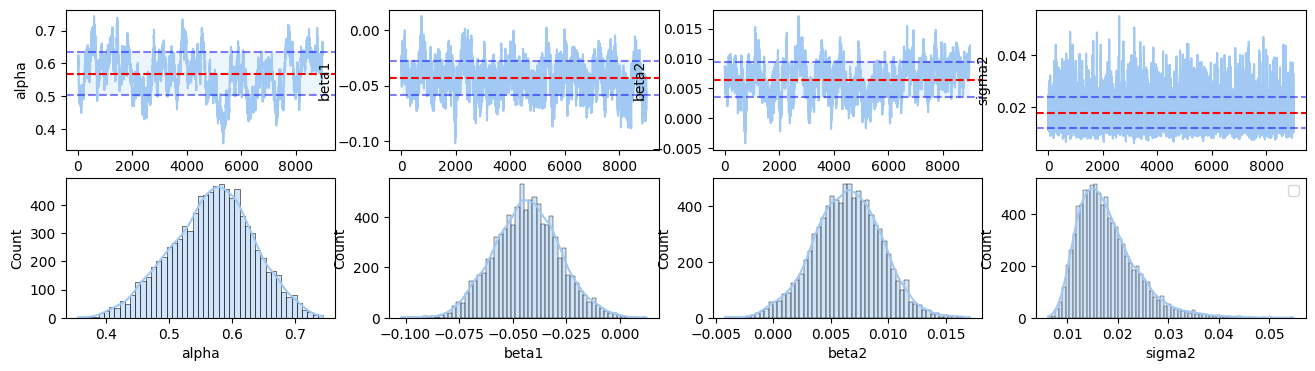

In [70]:
sns.set_palette("pastel")

fig, axs = plt.subplots(2,4)
fig.set_size_inches(16,4)

for i, variable in enumerate(results.columns):

    plot(variable, axs[0][i] )
    sns.histplot(results, x=variable, kde="True", fill=True,ax=axs[1][i])

plt.legend()
plt.show()

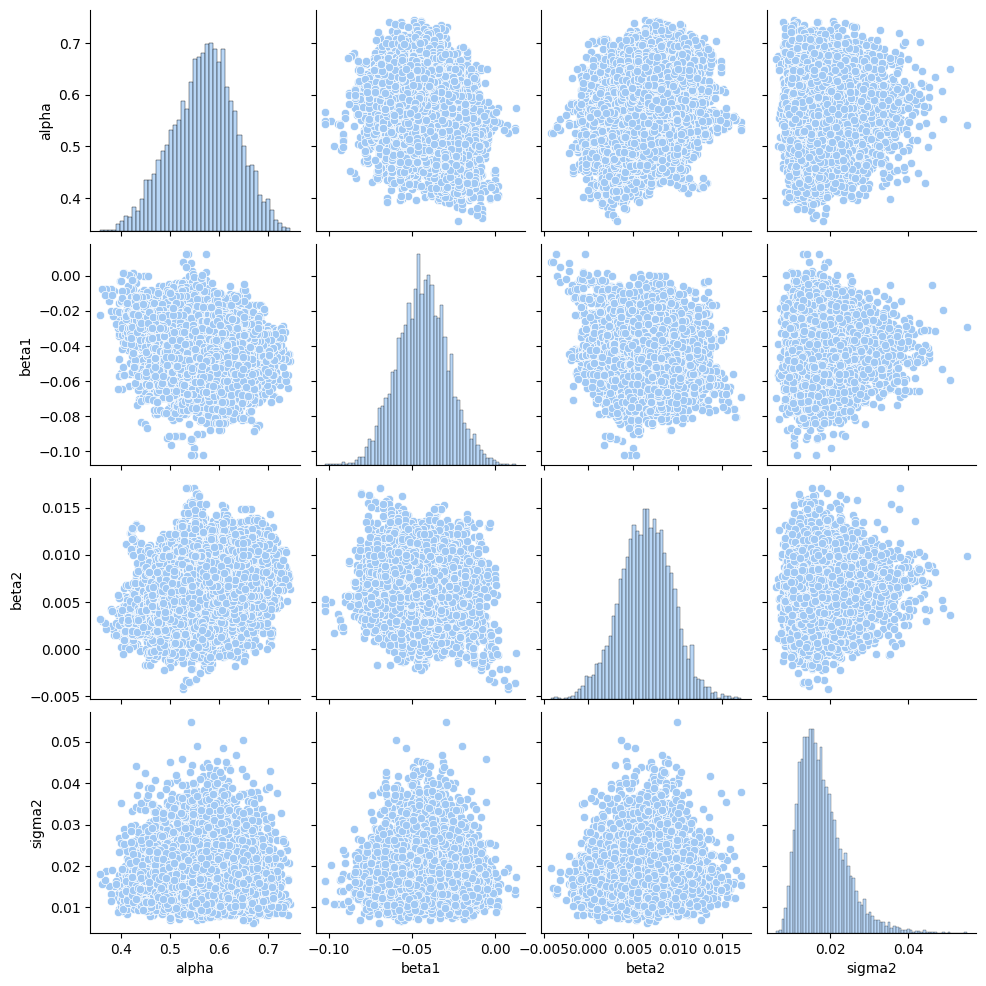

In [71]:
sns.pairplot(results)

# results' interpretation and conclusion

Text(0.5, 0, 'year')

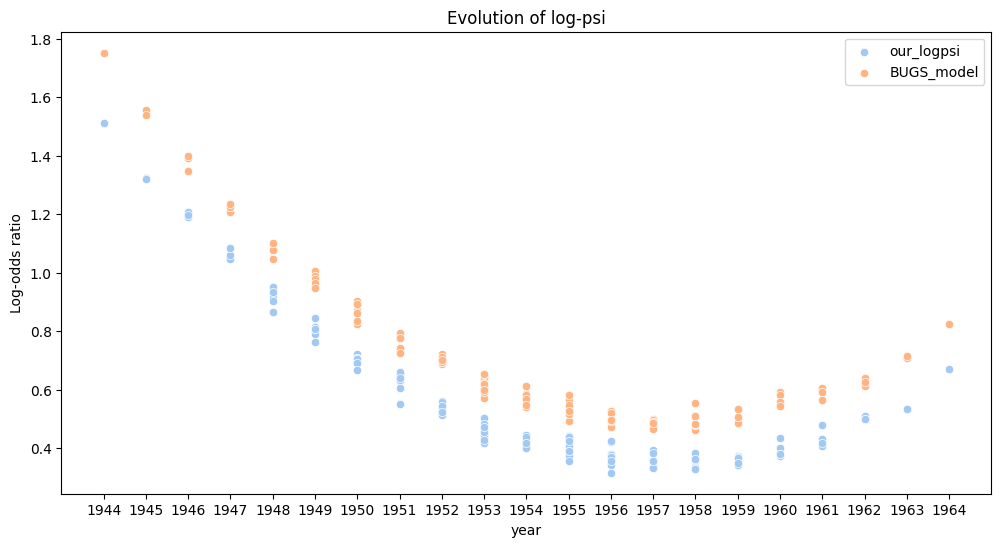

In [72]:
our_logpsi = results["alpha"].mean() + results["beta1"].mean() * year + results["beta2"].mean() * (year**2 - 22) + np.mean(chain_3,axis=0)
Breslow_and_Clayton= 0.566 +  (-0.469*year) + 0.0071* (year**2-2) +  np.mean(chain_3,axis=0)
bugs_b=np.random.normal(0, 0.15**2, 120)
BUGS_model =0.579 +  (-0.04557 *year) + 0.007041 * (year**2-2) +bugs_b
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

x_axis = [str(i+1954) for i in year]

ax = sns.scatterplot(
    x=x_axis,
    y=our_logpsi,
    label="our_logpsi",
)

ax = sns.scatterplot(
    x=x_axis,
    y=BUGS_model,
    label="BUGS_model",
)
plt.title("Evolution of log-psi")
plt.ylabel('Log-odds ratio')
plt.xlabel('year')
